# time库

time库是python处理时间的标准库。

## 获取现在时间

* `time.localtime()`：本地时间
* `time.gmtime()`：UTC世界统一时间  
北京时间比UTC早八个小时

In [1]:
import time

t_local = time.localtime()
t_UTC = time.gmtime()

In [2]:
t_local

time.struct_time(tm_year=2023, tm_mon=1, tm_mday=12, tm_hour=16, tm_min=42, tm_sec=19, tm_wday=3, tm_yday=12, tm_isdst=0)

In [3]:
t_UTC

time.struct_time(tm_year=2023, tm_mon=1, tm_mday=12, tm_hour=8, tm_min=42, tm_sec=19, tm_wday=3, tm_yday=12, tm_isdst=0)

In [4]:
# 返回本地时间的字符串
time.ctime()

'Thu Jan 12 16:42:20 2023'

## 时间戳与计时器

* `time.time()`：返回自纪元以来的秒数，记录sleep
* `time.perf_counter()`：随意选取一个时间点，记录现在时间到该时间点的间隔秒数，记录sleep
* `time.process_time()`：随意选取一个时间点，记录现在时间到该时间点的间隔秒数，不记录sleep  
`perf_counter()`精度较`time()`更高一些。  

通过两个时间戳的差值，可以实现计时器的功能。

In [5]:
# 记录开始时间
t_1_start = time.time()
t_2_start = time.perf_counter()
t_3_start = time.process_time()
print(t_1_start)
print(t_2_start)
print(t_3_start)

# 执行一段程序
res = 0
for i in range(1000000):
    i += 1
    
# sleep5秒
time.sleep(5)
# 记录结束时间
t_1_end = time.time()
t_2_end = time.perf_counter()
t_3_end = time.process_time()

# 打印计时器
print(f"time方法：{t_1_end-t_1_start:.3f}秒")
print(f"perf_counter方法：{t_2_end-t_2_start:.3f}秒")
print(f"process_time方法：{t_3_end-t_3_start:.3f}秒")

1673512940.0238922
1.6465884
0.296875
time方法：5.211秒
perf_counter方法：5.210秒
process_time方法：0.047秒


## 格式化

`time.strftime()`：自定义格式化输出

In [6]:
lctime = time.localtime()
time.strftime("%Y-%m-%d %A %H-%M-%S", lctime)

'2023-01-12 Thursday 16-42-25'

## sleep()方法

`time.sleep(t)`函数推迟调用线程的运行，可通过参数secs指秒数，表示进程挂起的时间。

# random库

随机数在计算机应用中十分常见。python通过random库提供各种伪随机数，基本可以用于除加密解密算法外的大多数工程应用。

## 随机种子seed(a=None)

* 相同种子会产生相同的随机数
* 如果不设置随机种子，以系统当前时间为默认值

In [7]:
from random import *

seed(10)
print(random())
seed(10)
print(random())

0.5714025946899135
0.5714025946899135


In [8]:
print(random())

0.4288890546751146


## 产生随机整数

1. `randint(a,b)`：产生[a,b]之间的随机整数

In [9]:
numbers = [randint(1,10) for i in range(10)]
numbers

[10, 1, 4, 8, 8, 5, 3, 1, 9, 8]

2. `randrange(a)`：产生[0,a)之间的随机整数

In [10]:
numbers = [randrange(10) for i in range(10)]
numbers

[5, 1, 3, 5, 0, 6, 2, 9, 5, 6]

3. `randrange(a,b,step)`：产生[a,b)之间以step为步长的随机整数

In [11]:
numbers = [randrange(0,10,2) for i in range(10)]
numbers

[6, 4, 4, 6, 2, 4, 4, 2, 6, 2]

## 产生随机浮点数

1. `random()`：产生[0.0,1.0)之间的随机浮点数

In [12]:
numbers = [random() for i in range(10)]
numbers

[0.9693881604049188,
 0.613326820546709,
 0.0442606328646209,
 0.004055144158407464,
 0.13397252704913387,
 0.941002271395834,
 0.3028605620290723,
 0.3661456016604264,
 0.8981962445391883,
 0.31436380495645067]

2. `uniform(a,b)`：产生[a,b]之间的随机浮点数

In [13]:
numbers = [uniform(2.1,3.5) for i in range(10)]
numbers

[2.8685750576173676,
 2.710443340673771,
 2.190991846577591,
 2.9183647159827024,
 3.281695056726663,
 2.318986485742369,
 2.414018556160458,
 2.678018290800777,
 2.1516948166820806,
 2.7952448980631672]

## 序列用函数

1. `choice(seq)`：从序列类型中随机返回一个元素

In [14]:
choice(['win','lose','draw'])

'draw'

In [15]:
choice('python')

'n'

2. `choices(seq, weights=None, k)`：对序列类型进行k次重复采样，可设置权重

In [16]:
choices(['win','lose','draw'],k=5)

['win', 'draw', 'win', 'lose', 'draw']

In [17]:
choices(['win','lose','draw'],[4,4,2],k=10)

['draw', 'win', 'draw', 'lose', 'lose', 'draw', 'win', 'win', 'draw', 'lose']

3. `shuffle(seq)`：将序列类型中元素随机排列，返回打乱后的序列

In [18]:
numbers = ['one', 'two', 'three', 'four']
shuffle(numbers)
numbers

['two', 'four', 'one', 'three']

4. `sample(pop, k)`：从序列中随机抽取k个元素，以列表类型返回

In [19]:
sample(['10','30','50','20','40'],k=3)

['10', '50', '30']

## 概率分布

1. `gauss(mean,std)`：生成一个符合高斯分布的随机数

In [20]:
# 标准正态分布
gauss(0,1)

-0.4766824049599741

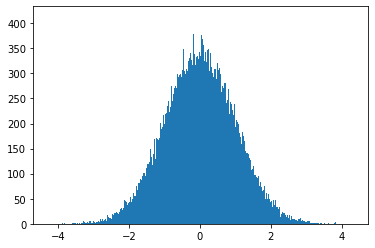

In [21]:
import matplotlib.pyplot as plt

res = [gauss(0,1) for i in range(100000)]

plt.hist(res,bins=1000)
plt.show()

## 案例一：用random库实现简单的微信红包分配

In [22]:
import random

def red_packet(total, num):                                  # total表示红包总金额，num表示红包个数
    ls = []
    for i in range(1,num):
        per = random.uniform(0.01,total/(num-i+1)*2)         # 假设每个红包的金额服从均匀分布，保证每个红包的期望是total/num(当前的num和total)
        ls.append(per)
        total -= per
    ls.append(total)
    return ls
    
red_packet(10,5)

[1.8525074968107116,
 3.9083251429791774,
 1.658891252170345,
 2.500208105911677,
 0.08006800212808995]

In [23]:
import numpy as np

# 重复发十万次红包，统计每个位置的平均值
res = []
for i in range(100000):
    res.append(red_packet(10,5))

res = np.array(res)
np.mean(res,axis=0)

array([2.00408936, 2.00426679, 2.00433641, 1.99875377, 1.98855368])

## 案例二：生成4位由数字和英文字母构成的验证码

In [24]:
import random
import string

print(string.digits)
print(string.ascii_letters)

s = string.digits+string.ascii_letters
v = random.sample(s,4)
print(v)
print(''.join(v))

0123456789
abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
['1', 'j', 'Z', '7']
1jZ7


# collections库：容器数据类型

In [25]:
import collections

## namedtuple：具名元组

用法：  
1. 可以表示点的坐标：`p = (1,2)`  
2. 构建一个新的元组子类：`collections.namedtuple(typename, field_names, *, rename=False, defaults=None, module=None)`

In [26]:
Point = collections.namedtuple("Point",["x","y"])
p = Point(1,y=2)
p

Point(x=1, y=2)

* 调用属性

In [27]:
p.x

1

In [28]:
p.y

2

* 有元组的性质

In [29]:
# 索引
print(p[0])
print(p[1])
# 赋值
x, y = p
print(x)
print(y)

1
2
1
2


In [30]:
# 是元组的子类
isinstance(p,tuple)

True

**例：模拟扑克牌**

In [31]:
Card = collections.namedtuple("Card",["rank","suit"])     # rank表示大小，suit表示花色
ranks = [str(i) for i in range(2,11)] + list("JQKA")
suits = ["spades", "diamonds", "clubs","hearts"]
print(ranks)
print(suits)

cards = [Card(rank,suit) for rank in ranks for suit in suits]
cards

['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
['spades', 'diamonds', 'clubs', 'hearts']


[Card(rank='2', suit='spades'),
 Card(rank='2', suit='diamonds'),
 Card(rank='2', suit='clubs'),
 Card(rank='2', suit='hearts'),
 Card(rank='3', suit='spades'),
 Card(rank='3', suit='diamonds'),
 Card(rank='3', suit='clubs'),
 Card(rank='3', suit='hearts'),
 Card(rank='4', suit='spades'),
 Card(rank='4', suit='diamonds'),
 Card(rank='4', suit='clubs'),
 Card(rank='4', suit='hearts'),
 Card(rank='5', suit='spades'),
 Card(rank='5', suit='diamonds'),
 Card(rank='5', suit='clubs'),
 Card(rank='5', suit='hearts'),
 Card(rank='6', suit='spades'),
 Card(rank='6', suit='diamonds'),
 Card(rank='6', suit='clubs'),
 Card(rank='6', suit='hearts'),
 Card(rank='7', suit='spades'),
 Card(rank='7', suit='diamonds'),
 Card(rank='7', suit='clubs'),
 Card(rank='7', suit='hearts'),
 Card(rank='8', suit='spades'),
 Card(rank='8', suit='diamonds'),
 Card(rank='8', suit='clubs'),
 Card(rank='8', suit='hearts'),
 Card(rank='9', suit='spades'),
 Card(rank='9', suit='diamonds'),
 Card(rank='9', suit='clubs'),


In [32]:
# 洗牌
import random

shuffle(cards)
cards

[Card(rank='4', suit='spades'),
 Card(rank='Q', suit='spades'),
 Card(rank='8', suit='diamonds'),
 Card(rank='3', suit='hearts'),
 Card(rank='Q', suit='diamonds'),
 Card(rank='10', suit='diamonds'),
 Card(rank='10', suit='spades'),
 Card(rank='A', suit='spades'),
 Card(rank='7', suit='hearts'),
 Card(rank='2', suit='diamonds'),
 Card(rank='9', suit='clubs'),
 Card(rank='8', suit='spades'),
 Card(rank='6', suit='diamonds'),
 Card(rank='4', suit='hearts'),
 Card(rank='A', suit='clubs'),
 Card(rank='9', suit='hearts'),
 Card(rank='3', suit='clubs'),
 Card(rank='Q', suit='hearts'),
 Card(rank='K', suit='hearts'),
 Card(rank='6', suit='hearts'),
 Card(rank='10', suit='hearts'),
 Card(rank='5', suit='spades'),
 Card(rank='K', suit='clubs'),
 Card(rank='3', suit='spades'),
 Card(rank='J', suit='hearts'),
 Card(rank='5', suit='hearts'),
 Card(rank='7', suit='spades'),
 Card(rank='K', suit='diamonds'),
 Card(rank='A', suit='diamonds'),
 Card(rank='6', suit='clubs'),
 Card(rank='5', suit='diamon

In [33]:
# 随机抽一张牌
choice(cards)

Card(rank='J', suit='hearts')

In [34]:
# 随机抽多张牌
sample(cards,5)

[Card(rank='5', suit='diamonds'),
 Card(rank='8', suit='spades'),
 Card(rank='Q', suit='hearts'),
 Card(rank='K', suit='diamonds'),
 Card(rank='K', suit='hearts')]

## counter：计数器工具

In [35]:
from collections import Counter

s = "牛奶奶找刘奶奶买牛奶"
colors = ['red','blue','red','green','blue','blue']
cnt_str = Counter(s)
cnt_color = Counter(colors)
print(cnt_str)
print(cnt_color)

Counter({'奶': 5, '牛': 2, '找': 1, '刘': 1, '买': 1})
Counter({'blue': 3, 'red': 2, 'green': 1})


In [36]:
# 是字典的一个子类
isinstance(Counter(),dict)

True

* 统计出现频率最高的n个元素

In [37]:
cnt_color.most_common(2)

[('blue', 3), ('red', 2)]

* 元素展开

In [38]:
list(cnt_str.elements())

['牛', '牛', '奶', '奶', '奶', '奶', '奶', '找', '刘', '买']

* 其他加减操作

In [39]:
c = Counter(a=3,b=1)
d = Counter(a=4,b=2)
c+d

Counter({'a': 7, 'b': 3})

**例：从一副牌中抽取10张，大于10的比例有多少**

In [40]:
cards = collections.Counter(tens=16,low_cards=36)      # 一副牌，大于10的有16张，小于等于10的有36张
seen = sample(list(cards.elements()),10)                 # 随机抽取10张
seen

['low_cards',
 'tens',
 'tens',
 'low_cards',
 'low_cards',
 'tens',
 'low_cards',
 'tens',
 'tens',
 'tens']

In [41]:
seen.count('tens')/10

0.6

## deque：双向队列

列表访问数据非常快速，插入和删除操作非常慢，因为需要通过移动元素位置来实现，特别是`insert(0,v)`和`pop(0)`是在列表开始位置进行插入和删除。  

双向队列可以在队列两边高效、快速地增加和删除元素。

In [42]:
from collections import deque

d = deque("cde")
d

deque(['c', 'd', 'e'])

In [43]:
# 右端增加
d.append("g")
d

deque(['c', 'd', 'e', 'g'])

In [44]:
# 左端增加
d.appendleft("l")
d

deque(['l', 'c', 'd', 'e', 'g'])

In [45]:
# 右端删除
d.pop()
d

deque(['l', 'c', 'd', 'e'])

In [46]:
# 左端删除
d.popleft()
d

deque(['c', 'd', 'e'])

# itertools库：迭代器

## 排列组合迭代器

1. `product()`：笛卡尔积

In [47]:
import itertools

for i in itertools.product('ABC','01'):
    print(i)

('A', '0')
('A', '1')
('B', '0')
('B', '1')
('C', '0')
('C', '1')


In [48]:
for i in itertools.product('ABC',repeat=3):
    print(i)

('A', 'A', 'A')
('A', 'A', 'B')
('A', 'A', 'C')
('A', 'B', 'A')
('A', 'B', 'B')
('A', 'B', 'C')
('A', 'C', 'A')
('A', 'C', 'B')
('A', 'C', 'C')
('B', 'A', 'A')
('B', 'A', 'B')
('B', 'A', 'C')
('B', 'B', 'A')
('B', 'B', 'B')
('B', 'B', 'C')
('B', 'C', 'A')
('B', 'C', 'B')
('B', 'C', 'C')
('C', 'A', 'A')
('C', 'A', 'B')
('C', 'A', 'C')
('C', 'B', 'A')
('C', 'B', 'B')
('C', 'B', 'C')
('C', 'C', 'A')
('C', 'C', 'B')
('C', 'C', 'C')


2. `permutations()`：排列

In [49]:
for i in itertools.permutations("ABC",3):          # 3是排列的长度，若不指定长度则默认为列表的长度
    print(i)

('A', 'B', 'C')
('A', 'C', 'B')
('B', 'A', 'C')
('B', 'C', 'A')
('C', 'A', 'B')
('C', 'B', 'A')


In [50]:
for i in itertools.permutations("ABC",2):         
    print(i)

('A', 'B')
('A', 'C')
('B', 'A')
('B', 'C')
('C', 'A')
('C', 'B')


3. `combinations()`：组合

In [51]:
for i in itertools.combinations('ABC',2):          # 2是组合的长度，组合长度不能缺省
    print(i)

('A', 'B')
('A', 'C')
('B', 'C')


4. `combinations_with_replacement()`：元素可重复组合

In [52]:
for i in itertools.combinations_with_replacement('ABC',2):
    print(i)

('A', 'A')
('A', 'B')
('A', 'C')
('B', 'B')
('B', 'C')
('C', 'C')


## 拉链

拉链就是将相同位置的元素组合到一起。

1. `zip()`：短拉链

In [53]:
for i in zip('ABC','012','xyz'):
    print(i)

('A', '0', 'x')
('B', '1', 'y')
('C', '2', 'z')


长度不一时，执行到最短的对象处就停止

In [54]:
for i in zip('ABC','012345'):      # zip()是内置的，不需要加itertools.
    print(i)

('A', '0')
('B', '1')
('C', '2')


2. `zip_longest()`：长拉链

长度不一时，执行到最长的对象处停止，缺省位置用None或指定字符替代。

In [55]:
for i in itertools.zip_longest('ABC','123456',fillvalue='?'):
    print(i)

('A', '1')
('B', '2')
('C', '3')
('?', '4')
('?', '5')
('?', '6')


## 无穷迭代器

1. `count(start=0,step=1)`：计数。创建一个迭代器，从start开始，返回均匀间隔的值。  
```
for i in itertools.count(10,2):
    print(i)
```

2. `cycle(iterable)`：循环。创建一个迭代器，返回iterable中所有元素，无限重复。  
```
for i in itertools.cycle('ABCDE'):
    print(i)
```

3. `repeat(object,times)`：创建一个迭代器，不断重复object，除非设定参数times，否则将无限重复。  

In [56]:
for i in itertools.repeat(10,3):
    print(i)

10
10
10


## 其他

1. `chain(iterables)`：锁链。把一组迭代对象串联起来，形成一个更大的迭代器。

In [57]:
for i in itertools.chain('ABC','0123'):
    print(i)

A
B
C
0
1
2
3


2. `enumerate(iterable,start=0)`：枚举，python内置。返回由两个元素组成的元组，结构是(index,item)，其中index从start开始，item从iterable中取。

In [58]:
for i in enumerate('ABCDEF',start=1):
    print(i)

(1, 'A')
(2, 'B')
(3, 'C')
(4, 'D')
(5, 'E')
(6, 'F')


3. `groupby(iterable,key=None)`：分组。创建一个迭代器，按照key指定的方式，返回iterable中连续的键和组。一般来说，要预先对数据进行排序，key为None时默认把连续重复元素分组

In [59]:
for key, group in itertools.groupby('AAAABBBCCCCDDABBCC'):
    print(key,list(group))

A ['A', 'A', 'A', 'A']
B ['B', 'B', 'B']
C ['C', 'C', 'C', 'C']
D ['D', 'D']
A ['A']
B ['B', 'B']
C ['C', 'C']


In [60]:
animals = ['duck','eagle','rat','giraffe','bear','bat','dolphin','shark','lion']
animals.sort(key=len)   # 按长度排序
print(animals)

['rat', 'bat', 'duck', 'bear', 'lion', 'eagle', 'shark', 'giraffe', 'dolphin']


In [61]:
for key, group in itertools.groupby(animals,key=len):
    print(key,list(group))

3 ['rat', 'bat']
4 ['duck', 'bear', 'lion']
5 ['eagle', 'shark']
7 ['giraffe', 'dolphin']


In [62]:
# 按首字母分组
animals.sort(key=lambda x:x[0])
print(animals)
for key,group in itertools.groupby(animals,key=lambda x:x[0]):
    print(key,list(group))

['bat', 'bear', 'duck', 'dolphin', 'eagle', 'giraffe', 'lion', 'rat', 'shark']
b ['bat', 'bear']
d ['duck', 'dolphin']
e ['eagle']
g ['giraffe']
l ['lion']
r ['rat']
s ['shark']


# os库

os库是Python标准库，包含几百个函数，常用路径操作、进程管理、环境参数等几类。

In [1]:
import os

## 路径操作

os.path子库以path为入口，用于操作和处理文件路径。

* os.path.relpath(path)：返回当前程序与文件之间的相对路径  

In [3]:
abspath = 'D:/JupyterNotebook/python学习笔记/python-advanced/file/test.txt'
replath = os.path.relpath(abspath)
print(replath)

file\test.txt


* os.path.abspath(path)：返回path在当前系统中的绝对路径

In [4]:
os.path.abspath(replath)

'D:\\JupyterNotebook\\python学习笔记\\python-advanced\\file\\test.txt'

* os.path.split()：由链表tail和head组成，tail就是file，head就是file之前的路径。

In [5]:
head_tail = os.path.split(abspath)
print(head_tail[0])
print(head_tail[1])

D:/JupyterNotebook/python学习笔记/python-advanced/file
test.txt


* os.path.join()：连接两个或更多的路径名  

In [6]:
path1 = 'python学习笔记'
path2 = 'python-advanced'
path3 = 'file'
os.path.join(path1,path2,path3)

'python学习笔记\\python-advanced\\file'

> 注意，在win10使用os.path.join 拼接文件路径的时候路径中会出现双斜杠，导致路径无效，找不到文件，使用 replace('\\','/') 进行替换，或者不使用os.path.join拼接，直接字符串拼接  path_base + "/" +target_path

* os.path.exists()：判断括号里的文件是否存在的意思，括号内的可以是文件路径。返回布尔型
* os.path.isabs(path)：是否是绝对路径

In [7]:
os.path.exists(replath)

True

In [8]:
os.path.isabs(replath)

False

* os.fspath()：返回路径的文件系统表示。返回字符串类型

In [9]:
os.fspath(abspath)

'D:/JupyterNotebook/python学习笔记/python-advanced/file/test.txt'

* os.getcwd()：列出当前工作目录

In [10]:
os.getcwd()

'D:\\JupyterNotebook\\python学习笔记\\python-advanced'

## 文件操作

* os.mkdir(path，mode)：path为要创建的目录。mode为目录设置的数字权限

In [11]:
os.mkdir('file/test')

* os.listdir()：返回指定的文件夹包含的文件或文件夹的名字的列表。

In [12]:
os.listdir('file')

['aaa', 'test', 'test.txt']

* os.path.basename(path)：传入一个完整的文件路径，只获取其文件名

In [13]:
os.path.basename(abspath)

'test.txt'

* os.path.isdir()：函数判断某一路径是否为目录

In [14]:
os.path.isdir('file/test')

True

* os.rename(path)：将文件或文件夹重命名

In [16]:
os.rename('file/test','file/aaa')

In [17]:
os.listdir('file')

['aaa', 'test.txt']

* os.path.getsize(path)：传入一个文件路径，返回该文件的大小

In [18]:
os.path.getsize(abspath)

31

* os.rmdir(path)：删除空文件夹
* os.removedirs(path)：递归删除目录

### os.walk()

os.walk会遍历我们指定的文件夹，每一层遍历：  
* root保存的就是当前遍历的文件夹的绝对路径；
* dirs保存当前文件夹下的所有子文件夹的名称（仅一层，孙子文件夹不包括）
* files保存当前文件夹下的所有文件的名称

In [19]:
# 操作的文件夹路径
operate_path = "D:/JupyterNotebook/python学习笔记/python-advanced"

for root, dirs, files in os.walk(operate_path):
    print('root:',root)
    print('dirs:',dirs)
    print('files:',files)
    print('\n')

root: D:/JupyterNotebook/python学习笔记/python-advanced
dirs: ['.ipynb_checkpoints', 'file']
files: ['01.正则表达式.ipynb', '02.匿名函数lambda.ipynb', '03.python标准库.ipynb']


root: D:/JupyterNotebook/python学习笔记/python-advanced\.ipynb_checkpoints
dirs: []
files: ['03.python标准库-checkpoint.ipynb']


root: D:/JupyterNotebook/python学习笔记/python-advanced\file
dirs: ['aaa']
files: ['test.txt']


root: D:/JupyterNotebook/python学习笔记/python-advanced\file\aaa
dirs: []
files: []




## 进程管理

* os.system(command)：执行程序或命令command，在Windows系统中，返回值为cmd的调用返回信息

In [20]:
os.system('python -V')

0

## 环境参数

* os.linesep：当前操作系统的换行符

In [21]:
os.linesep

'\r\n'

* os.sep：当前操作系统的路径分隔符

In [22]:
os.sep

'\\'

* os.pathsep：当前操作系统的环境变量中的分隔符

In [23]:
os.pathsep

';'

* os.cpu_count()：获得当前系统的CPU数量

In [24]:
os.cpu_count()

8

* os.getlogin()：获得当前系统登录用户名称

In [25]:
os.getlogin()

'gaoyu'